In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df['PRICE'] = boston.target
yta = df['PRICE']
xda = df.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)

neg_mse_scores = cross_val_score(rf, xda, yta, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE: ', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE: ', np.round(rmse_scores, 2))
print('5 folds의 평균 RMSE: ', avg_rmse)

/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


5 folds의 개별 Negative MSE:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds의 개별 RMSE:  [2.81 3.63 4.54 6.8  4.34]
5 folds의 평균 RMSE:  4.422538982804892


In [2]:
def get_model_cv_prediction(model, xda, yta):
    neg_mse_scores = cross_val_score(model, xda, yta, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('###### ', model.__class__.__name__, ' #####')
    print('5 folds의 개별 Negative MSE: ', np.round(neg_mse_scores, 2))
    print('5 folds의 개별 RMSE: ', np.round(rmse_scores, 2))
    print('5 folds의 평균 RMSE: ', avg_rmse)

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt = DecisionTreeRegressor(random_state=0, max_depth=4)
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
gb = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb = XGBRegressor(n_estimators=1000)
lgb = LGBMRegressor(n_estimators=1000)

models = [dt, rf, gb, xgb, lgb]
for model in models:
    get_model_cv_prediction(model, xda, yta)

######  DecisionTreeRegressor  #####
5 folds의 개별 Negative MSE:  [-11.94 -36.25 -29.63 -47.23 -65.56]
5 folds의 개별 RMSE:  [3.46 6.02 5.44 6.87 8.1 ]
5 folds의 평균 RMSE:  5.977957424580515
######  RandomForestRegressor  #####
5 folds의 개별 Negative MSE:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 folds의 개별 RMSE:  [2.81 3.63 4.54 6.8  4.34]
5 folds의 평균 RMSE:  4.422538982804892
######  GradientBoostingRegressor  #####
5 folds의 개별 Negative MSE:  [ -7.52 -14.52 -19.57 -39.45 -16.72]
5 folds의 개별 RMSE:  [2.74 3.81 4.42 6.28 4.09]
5 folds의 평균 RMSE:  4.26899822168126
[17:45:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of

/home/arti/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


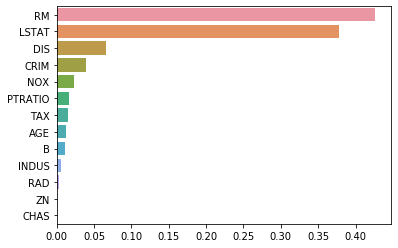

In [4]:
import seaborn as sns
%matplotlib inline

rf.fit(xda, yta)

feature = pd.Series(data=rf.feature_importances_, index=xda.columns)
feature = feature.sort_values(ascending=False)
sns.barplot(x=feature, y=feature.index)

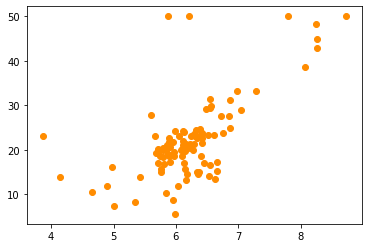

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df[['RM', 'PRICE']]
            .sample(n=100, random_state=0)
            .RM,
           df[['RM', 'PRICE']]
            .sample(n=100, random_state=0)
            .PRICE,
            c='darkorange')

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
rf2 = DecisionTreeRegressor(max_depth=2)
rf7 = DecisionTreeRegressor(max_depth=7)

xte = np.arange(4.5, 8.0, 0.04).reshape(-1, 1)

samples = df[['RM', 'PRICE']].sample(n=100, random_state=0)

xfe = samples['RM'].values.reshape(-1, 1)
yta = samples['PRICE'].values.reshape(-1, 1)

lr.fit(xfe, yta)
rf2.fit(xfe, yta)
rf7.fit(xfe, yta)

pred_lr = lr.predict(xte)
pred_rf2 = rf2.predict(xte)
pred_rf7 = rf7.predict(xte)

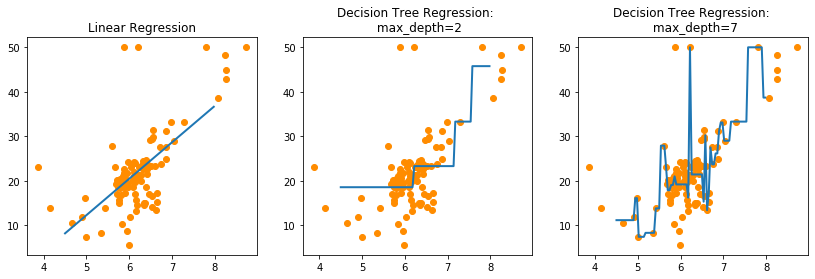

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(samples.RM, samples.PRICE, c='darkorange')
ax1.plot(xte, pred_lr, label='linear', linewidth=2)

ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(samples.RM, samples.PRICE, c='darkorange')
ax2.plot(xte, pred_rf2, label='max_depth:2', linewidth=2)

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(samples.RM, samples.PRICE, c='darkorange')
ax3.plot(xte, pred_rf7, label='max_depth:7', linewidth=2)